<a href="https://colab.research.google.com/github/akshaygrao77/Deep-learning-assignment1/blob/Question-3/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
!pip install wandb
!wandb login

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 143 kB 43.3 MB/s 
     |████████████████████████████████| 180 kB 38.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=8b86780f6862da93142ec5a14f95d3eda1abf30af349e91a38b9d494a2219291
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [3]:
import wandb

wandb.init(project="Deep learning assignment1", entity="akshaygrao")

wandb: Currently logged in as: akshaygrao (use `wandb login --relogin` to force relogin)


In [4]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}

# **Question 1 starts**

Loading dataset from fashio-mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
def print_image_per_class():
  num_class=10
  for cls in range(num_class):
    i=0
    while(True):
      i=i+1
      if(y_train[i] == cls):
        # image = x_train[i]
        plt.imshow( x_train[i], cmap='gray')
        plt.show()
        plt.close()
        break;

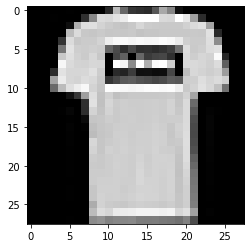

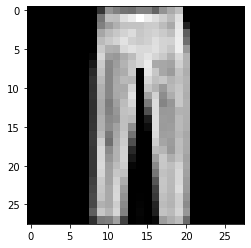

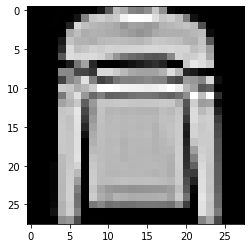

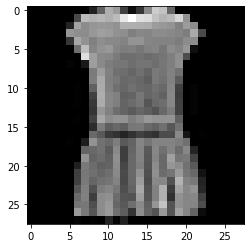

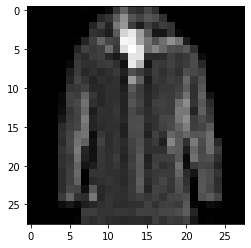

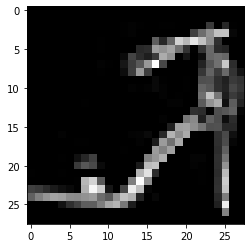

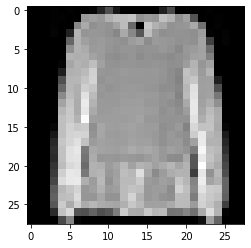

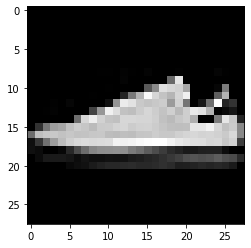

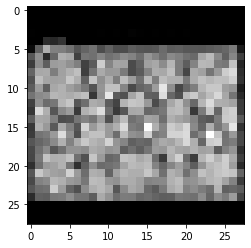

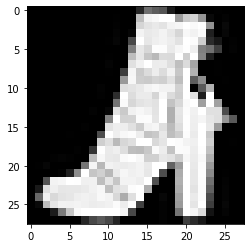

In [7]:
print_image_per_class()

# **Question 2 starts**

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

Flatten each image into a 1-d array to input to the network

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [11]:
x_train.shape

(60000, 784)

In [12]:
x_test.shape

(10000, 784)

Categorical encoding for labels

In [13]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

In [14]:
class Activation:
    def sigmoid(self, X):
      return 1.0 / (1.0 + np.exp(-X))

    def softmax(self, X):
      exps = np.exp(X)
      return exps / np.sum(exps)

In [15]:
class InputLayer:
  number_of_inputs=0

  def __init__(self,number_of_inputs) -> None:
      self.number_of_inputs = number_of_inputs

In [16]:
class Layer:
  number_of_neurons=0
  activation = 'sigmoid'
  
  def __init__(self,number_of_neurons,activation) -> None:
      self.number_of_neurons = number_of_neurons
      self.activation = activation

In [17]:
t=[1,2,3]
print(len(t))
for i in range(1,len(t)):
  print(i)

3
1
2


In [136]:
t= np.array([1,2,3])
t= t[np.newaxis]
print(t.T)
print(t.shape)
r = np.array([0,1,2])[np.newaxis].T
r = 5*r
print(r)
print(r.shape)
print(np.matmul(r,t))

[[1]
 [2]
 [3]]
(1, 3)
[[ 0]
 [ 5]
 [10]]
(3, 1)
[[ 0  0  0]
 [ 5 10 15]
 [10 20 30]]


In [49]:
x1 = np.arange(9.0).reshape((3, 3))
print(x1)
x2 = np.arange(3.0).reshape((3,1))
print(x2)
print(np.multiply(x2, x1))
print(np.matmul(x1,x2))

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[0.]
 [1.]
 [2.]]
[[ 0.  0.  0.]
 [ 3.  4.  5.]
 [12. 14. 16.]]
[[ 5.]
 [14.]
 [23.]]


In [114]:
test= [None]*3
test[2]=np.arange(9).reshape((3,3))
print(test)

[None, None, array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])]


In [139]:
a1=np.array([[1,2,3]])
a2 = np.array([2,3,4])
a3 = a1 + a2
print(a3[0])

[3 5 7]


In [176]:
class ANNModel:
  def __init__(self):
    self.layers = []

  def addInputLayer(self,input_layer_obj):
    self.input_layer_obj = input_layer_obj
  
  def addLayer(self,layer_obj):
    self.layers.append(layer_obj)
  
  def compile(self,loss):
    self.loss = loss
    self.randInitWeights()
    self.randInitBiases()
    self.initAH()
    self.array_grad_L_by_A = [None]*(len(self.layers))
    self.array_grad_L_by_weight = [None]*(len(self.layers))
    self.array_grad_L_by_bias = [None]*(len(self.layers))
    self.array_grad_L_by_H = [None]*(len(self.layers))
    
  def initAH(self):
    self.A = []
    for l in range(len(self.layers)):
      self.A.append(np.zeros(self.layers[l].number_of_neurons))
    
    self.H = []
    self.H.append(np.zeros(self.input_layer_obj.number_of_inputs))
    for l in range(1,len(self.layers)+1):
      self.H.append(np.zeros(self.layers[l-1].number_of_neurons))
    
    # print(self.A)
    # print(self.H)

  def randInitWeights(self):
    self.weight_array=[np.random.rand(self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons)]
    # print(self.weight_array)
    # print(self.weight_array[0].shape)
    for l in range(1,len(self.layers)):
      self.weight_array.append(np.random.rand(self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons))
    #   print(self.weight_array[l].shape)
    # print(self.weight_array)
    # print(len(self.weight_array))

  def randInitBiases(self):
    self.bias = []
    for l in range(len(self.layers)):
      self.bias.append(np.random.rand(self.layers[l].number_of_neurons))
      # print(self.bias)
      # print(self.bias[l].shape)

  def fit(self,x_train,y_train,epochs,verbose=1):
    self.verbose=verbose
    if(self.verbose >= 4):
      self.print_state()
    for current_epoch in range(epochs):
      if(self.verbose >=2):
        print("\n &&&&&&&&&&&&&&&&&&&&  Epoch ",current_epoch," &&&&&&&&&&&&&&&&&&&&&&&&")
      sum_of_loss = 0
      for index in range(x_train.shape[0]):
        y_pred = self.feed_forward(x_train[index])
        self.back_prop(y_pred,y_train[index])
        self.updateParameters()
        current_loss = computeLoss(y_pred,y_train[index],self.loss)
        sum_of_loss = sum_of_loss + current_loss
        if(self.verbose >= 3):
          print("Data point number:",index)
        if(self.verbose >= 4):
          self.print_state()
        if(self.verbose >= 3):
          print("Predicted output:",y_pred)
          print("Actual output:",y_train[index])
          print("Loss:",current_loss)
      
      if(self.verbose >= 2):
        print("Average loss: ",(sum_of_loss/x_train.shape[0]))

  def updateParameters(self,learning_rate=1):
    for l in range(len(self.layers)):
      self.weight_array[l] = self.weight_array[l] - (learning_rate)*self.array_grad_L_by_weight[l]
      self.bias[l]=(self.bias[l] - (learning_rate)*self.array_grad_L_by_bias[l])[0]

  def feed_forward(self,inpX):
    self.H[0]= inpX
    for l in range(len(self.layers)):
      self.A[l]=np.matmul(self.H[l],self.weight_array[l]) + self.bias[l]
      self.H[l+1] = calculateActivation(self.layers[l].activation,self.A[l])
    return self.H[len(self.layers)]
  
  def back_prop(self,y_pred,y_train):
    if(self.verbose >= 5):
      print("Back prop starts ===========================")
    self.grad_L_by_ypred = computeLossGradient(y_pred,y_train,self.loss)
    self.grad_ypred_by_Aoutput = computeGradientHwrtA(y_pred,self.A[len(self.layers)-1],self.layers[len(self.layers)-1].activation)
    if(len(self.grad_ypred_by_Aoutput.shape)==2):
      self.array_grad_L_by_A[len(self.layers)-1]=np.matmul(self.grad_L_by_ypred,self.grad_ypred_by_Aoutput)
    else:
      self.array_grad_L_by_A[len(self.layers)-1]=np.multiply(self.grad_L_by_ypred,self.grad_ypred_by_Aoutput)
    
    for l in reversed(range(len(self.layers))):
      current_H=self.H[l]
      current_H=current_H[np.newaxis].T
      if(self.verbose >= 5):
        print("current_H:[",l,"]:",current_H)
        print("current_H shape:[",l,"]:",current_H.shape)
      current_grad_L_by_A = self.array_grad_L_by_A[l]
      if(len(current_grad_L_by_A.shape)==1):
        current_grad_L_by_A = current_grad_L_by_A[np.newaxis]
      
      if(self.verbose >= 5):
        print("current_grad_L_by_A[",l," ]:",current_grad_L_by_A)
        print("current_grad_L_by_A[",l," ] shape:",current_grad_L_by_A.shape)
      
      self.array_grad_L_by_weight[l]=np.matmul(current_H,current_grad_L_by_A)
      
      if(self.verbose >= 5):
        print("self.array_grad_L_by_weight[",l,"]:",self.array_grad_L_by_weight[l])
      
      self.array_grad_L_by_bias[l] = current_grad_L_by_A
      
      if(self.verbose >= 5):
        print("self.array_grad_L_by_bias[",l,"]:",self.array_grad_L_by_bias[l])
      
      self.array_grad_L_by_H[l] = np.matmul(self.weight_array[l],current_grad_L_by_A.T)
      
      if(self.verbose >= 5):
        print("self.array_grad_L_by_H[",l,"]:",self.array_grad_L_by_H[l])
      
      if(l >= 1):
        current_grad_H_by_A = computeGradientHwrtA(self.H[l],self.A[l-1],self.layers[l-1].activation)
        current_grad_H_by_A = current_grad_H_by_A[np.newaxis]
        if(self.verbose >= 5):
          print("current_grad_H_by_A[",l,"]:",current_grad_H_by_A)
        self.array_grad_L_by_A[l-1] = np.multiply(self.array_grad_L_by_H[l].T,current_grad_H_by_A)
        if(self.verbose >= 5):
          print("self.array_grad_L_by_A[",(l-1),"]:",self.array_grad_L_by_A[l-1])



  def print_state(self):
    for l in range(len(self.layers)):
      print("Layer",l)
      print("============================")
      print("Activation:",self.layers[l].activation)
      print("Number of units:",self.layers[l].number_of_neurons)
      print("Weights",self.weight_array[l])
      print("Biases",self.bias[l])
      print("H's",self.H[l])
      print("A's",self.A[l])
      print("**************************")

In [151]:
def calculateActivation(activation,A):
  if(activation =='sigmoid'):
    return Activation().sigmoid(A)
  elif(activation == 'softmax'):
    return Activation().softmax(A)
  else:
    print("Invalid activation function")

def computeLoss(y_pred,y_actual,loss):
  loss_value=0
  if(loss=='categorical_crossentropy'):
    # To hold label index from y_actual
    correct_index=findLabelIndex(y_actual)
    loss_value = -math.log(y_pred[correct_index],2)
  return loss_value

def computeLossGradient(y_pred,y_actual,loss):
  grad_L_y = np.zeros(len(y_pred))
  if(loss=='categorical_crossentropy'):
    # To hold label index from y_actual
    correct_index=findLabelIndex(y_actual)
    grad_L_y[correct_index] = -1/y_pred[correct_index]
  
  return grad_L_y

def findLabelIndex(y_actual):
  for j in range(len(y_actual)):
    if(y_actual[j]==1):
      return j

def computeGradientHwrtA(H,A,activation):
  grad_H_by_A = []
  # Gradient is a kxk jacobian
  if(activation == 'softmax'):
    grad_H_by_A=computeSoftmaxGrad(H)
  elif(activation == 'sigmoid'):
    grad_H_by_A=computeSigmoidGrad(H)
  return grad_H_by_A

def computeSoftmaxGrad(H):
  grad_softmax_jacobian = np.zeros(H.shape[0]*H.shape[0]).reshape(H.shape[0],H.shape[0])
  for i in range(H.shape[0]):
    for j in range(H.shape[0]):
      if(i == j):
        grad_softmax_jacobian[i][j] = H[i]*(1-H[j])
      else:
        grad_softmax_jacobian[i][j] = -H[i]*H[j]
  return grad_softmax_jacobian

  
def computeSigmoidGrad(H):
  return H*(1-H)

In [156]:
sample_xtrain=np.array([[1,2],[2,3],[3,4]])
print(sample_xtrain.shape)
print(sample_xtrain)

(3, 2)
[[1 2]
 [2 3]
 [3 4]]


In [155]:
sample_ytrain=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
print(sample_ytrain)
print(sample_ytrain.shape)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]
(3, 4)


In [185]:
ann_model = ANNModel()
input_layer = InputLayer(2)
hidden_layer1 = Layer(300,activation='sigmoid')
hidden_layer2 = Layer(10,activation='sigmoid')
output_layer = Layer(4,activation='softmax')

ann_model.addInputLayer(input_layer)
ann_model.addLayer(hidden_layer1)
# ann_model.addLayer(hidden_layer2)
ann_model.addLayer(output_layer)

ann_model.compile('categorical_crossentropy')
ann_model.fit(sample_xtrain,sample_ytrain,5,3)
# ann_model.print_state()


 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&
Data point number: 0
Predicted output: [1.89798915e-05 1.87759599e-02 9.78620107e-01 2.58495297e-03]
Actual output: [1 0 0 0]
Loss: 15.685168731350993
Data point number: 1
Predicted output: [1.00000000e+000 1.85971205e-103 9.63440577e-202 5.65784365e-103]
Actual output: [0 1 0 0]
Loss: 341.26351451537187
Data point number: 2
Predicted output: [2.99766627e-113 1.00000000e+000 1.34510769e-199 6.64727885e-105]
Actual output: [0 0 1 0]
Loss: 660.6359691973657
Average loss:  339.19488414802953

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&
Data point number: 0
Predicted output: [9.21677079e-10 4.46868099e-06 9.99916654e-01 7.88767398e-05]
Actual output: [1 0 0 0]
Loss: 30.015019576492673
Data point number: 1
Predicted output: [1.00000000e+000 7.43474755e-059 5.72504055e-114 6.47882070e-057]
Actual output: [0 1 0 0]
Loss: 193.09947384182715
Data point number: 2
Predicted output: [1.06845794e-062 1.00000000e+000 2.78767352